### A.1. Hard margin visualization using toy dataset

In [31]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

In [29]:
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

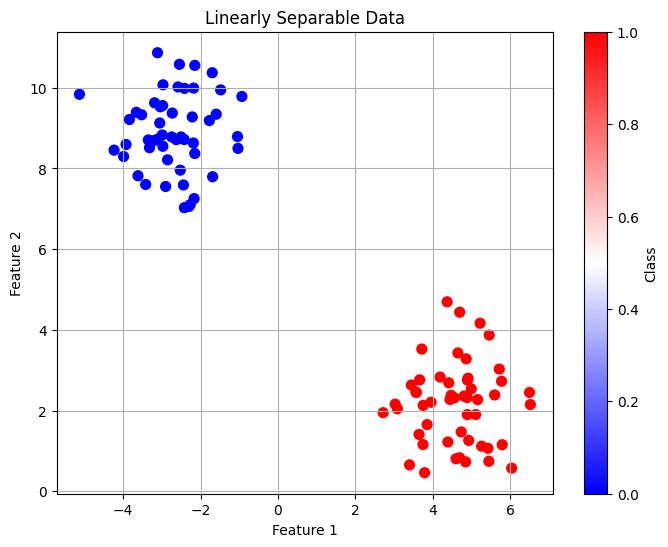

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.title('Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

In [32]:
svm_linear = SVC(kernel='linear', random_state=42)

In [33]:
svm_linear.fit(X, y)

SVC(kernel='linear', random_state=42)

In [34]:
w = svm_linear.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
yy = a * xx - (svm_linear.intercept_[0]) / w[1]

In [35]:
margin = 1 / np.sqrt(np.sum(w**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin

In [36]:
support_vectors = svm_linear.support_vectors_

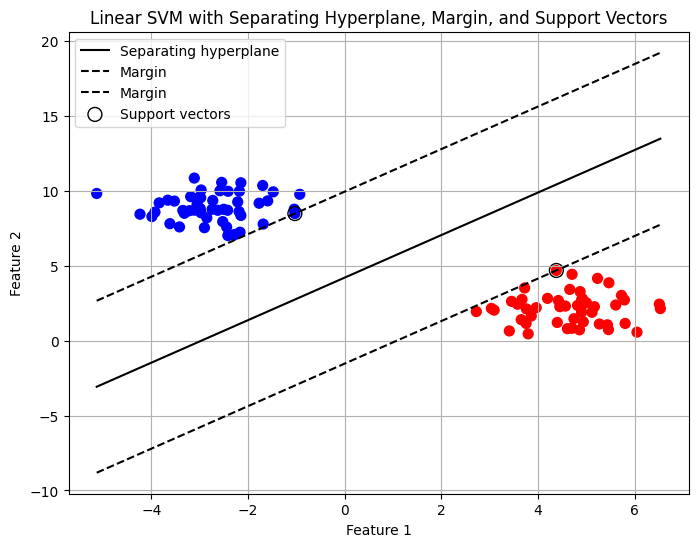

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.plot(xx, yy, 'k-', label='Separating hyperplane')
plt.plot(xx, yy_down, 'k--', label='Margin')
plt.plot(xx, yy_up, 'k--', label='Margin')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support vectors')
plt.title('Linear SVM with Separating Hyperplane, Margin, and Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

### A.2. Effect of C on margin (soft-margins SVM)

In [38]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [39]:
X, y = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=2.0)

In [40]:
C_values = [0.1, 1, 100]

In [41]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

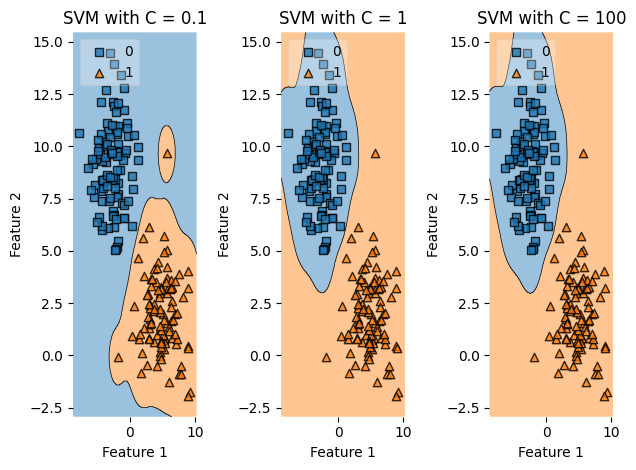

In [45]:
for i, C_value in enumerate(C_values):
    svm_rbf = SVC(kernel='rbf', C=C_value, gamma='auto', random_state=42)
    svm_rbf.fit(X, y)
    plt.subplot(1, len(C_values), i + 1)
    plot_decision_regions(X=X, y=y, clf=svm_rbf, legend=2)
    plt.title(f'SVM with C = {C_value}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

### B.1. Nonlinear separation using polynomial kernel and comparison of results

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [4]:
X, y = make_circles(n_samples=100, factor=0.1, noise=0.1, random_state=42)

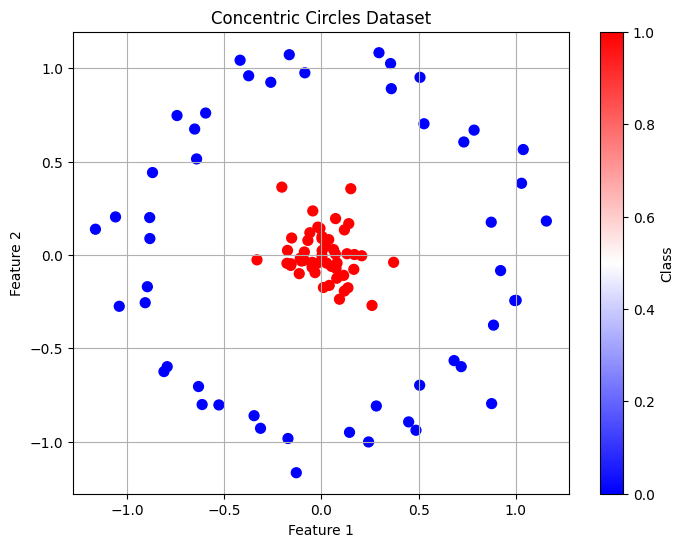

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.title('Concentric Circles Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

In [8]:
kernels = ["linear","poly"]
degree = 3

In [9]:
plt.figure(figsize=(18, 5))

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

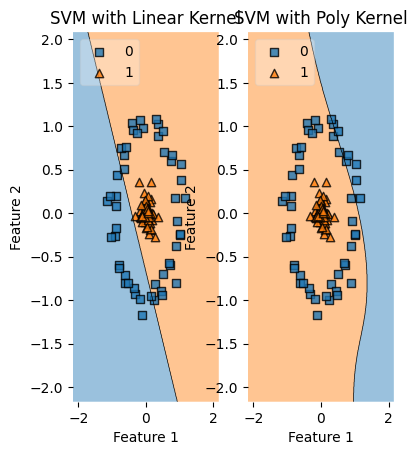

In [10]:
for i,kernel in enumerate(kernels):
  if kernel=="poly":
    classifier = SVC(kernel=kernel, degree=degree, gamma="auto")
  else:
    classifier = SVC(kernel=kernel,gamma="auto")
  classifier.fit(X,y)
  plt.subplot(1, 3, i+1)
  plot_decision_regions(X=X, y=y, clf=classifier, legend=2)
  plt.title(f'SVM with {kernel.capitalize()} Kernel')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')

### B.2. Effect of gamma hyperparameter on the RBF kernel training

In [12]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [13]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
gamma_values = [0.1,1,10]

In [19]:
plt.figure(figsize=(18, 5))

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

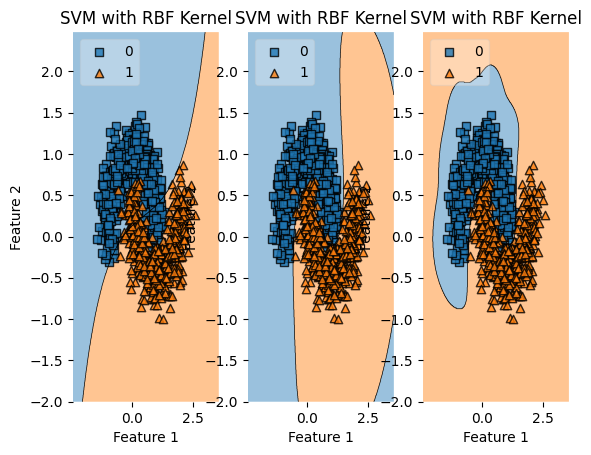

In [20]:
for i,value in enumerate(gamma_values):
  svm_rbf = SVC(kernel='rbf', C=1, gamma=value, random_state=42)
  svm_rbf.fit(X_train, y_train)
  plt.subplot(1, len(gamma_values), i+1)
  plot_decision_regions(X=X, y=y, clf=svm_rbf, legend=2)
  plt.title(f'SVM with RBF Kernel')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')